In [23]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))

In [24]:
from src.load_data import load_data

csv_path = "../Data/Huntington_Disease_Dataset.csv"
df = load_data(csv_path)

df.shape, df.head()


((48536, 21),
                              Patient_ID  Age     Sex Family_History  \
 0  b2a49170-8561-4665-9371-2240b55dd87a   31    Male             No   
 1  f5fae45d-8718-41c4-a957-6928f79f3c8e   33  Female            Yes   
 2  66ab0567-050b-4d56-9ec4-b676309899a6   69    Male            Yes   
 3  996a48e4-e841-418f-a539-5a7a86cd815d   66    Male            Yes   
 4  d45c7ca8-7125-4aaa-8018-5bbc60d35a1f   43  Female            Yes   
 
    HTT_CAG_Repeat_Length Motor_Symptoms Cognitive_Decline  Chorea_Score  \
 0                     67       Moderate            Severe          8.80   
 1                     38         Severe          Moderate          3.24   
 2                     37         Severe          Moderate          1.01   
 3                     50           Mild            Severe          3.21   
 4                     48       Moderate              Mild          2.31   
 
    Brain_Volume_Loss  Functional_Capacity  ... HTT_Gene_Expression_Level  \
 0               

In [25]:
import pandas as pd
from src.data_cleaning import (
    select_columns,
    strip_spaces_columns,
    normalize_case_columns,
    gene_filter,
    convert_numeric_columns,
    drop_missing_required,
)

columns_list = ["Patient_ID", "Gene/Factor", "Disease_Stage", "Brain_Volume_Loss", "Age", "Sex"]

sub_df = select_columns(df, columns_list)

sub_df = strip_spaces_columns(sub_df, columns=["Gene/Factor", "Disease_Stage", "Sex"])
sub_df = normalize_case_columns(sub_df, columns=["Gene/Factor", "Disease_Stage", "Sex"])

sub_df = gene_filter(
    sub_df,
    "Gene/Factor",
    values_list=["mlh1", "msh3", "htt (somatic expansion)"],
)

sub_df = convert_numeric_columns(sub_df, ["Brain_Volume_Loss", "Age"])

required_cols = ["Brain_Volume_Loss", "Age", "Disease_Stage", "Gene/Factor", "Sex"]
sub_df = drop_missing_required(sub_df, required_cols)

print(sub_df.shape)
sub_df.head()


(36307, 6)


,Patient_ID,Gene/Factor,Disease_Stage,Brain_Volume_Loss,Age,Sex
2,66ab0567-050b-4d56-9ec4-b676309899a6,msh3,early,2.82,69,male
3,996a48e4-e841-418f-a539-5a7a86cd815d,msh3,pre-symptomatic,6.77,66,male
4,d45c7ca8-7125-4aaa-8018-5bbc60d35a1f,htt (somatic expansion),late,7.53,43,female
5,38cea144-1280-42cb-9362-dbf0f4aafe3b,msh3,middle,3.34,58,female
6,10760159-d219-4a4f-b374-f25ebeb1f9a6,mlh1,middle,2.50,80,female


In [26]:
print("shape:", sub_df.shape)
print(sub_df[["Brain_Volume_Loss","Age","Disease_Stage","Gene/Factor","Sex"]].isna().sum())
print(sub_df[["Age","Brain_Volume_Loss"]].describe())


shape: (36307, 6)
Brain_Volume_Loss    0
Age                  0
Disease_Stage        0
Gene/Factor          0
Sex                  0
dtype: int64
                Age  Brain_Volume_Loss
count  36307.000000       36307.000000
mean      55.065222           5.260934
std       14.785485           1.872521
min       30.000000           2.000000
25%       42.000000           3.640000
50%       55.000000           5.280000
75%       68.000000           6.880000
max       80.000000           8.500000


In [27]:
print(sub_df["Gene/Factor"].value_counts())
print(sub_df["Disease_Stage"].value_counts())

stage_gene = sub_df.groupby(["Disease_Stage","Gene/Factor"]).size().sort_values()
print("Smallest Stage×Gene groups:\n", stage_gene.head(10))


Gene/Factor
mlh1                       12223
msh3                       12056
htt (somatic expansion)    12028
Name: count, dtype: Int64
Disease_Stage
middle             9179
pre-symptomatic    9171
late               8984
early              8973
Name: count, dtype: Int64
Smallest Stage×Gene groups:
 Disease_Stage    Gene/Factor            
late             msh3                       2932
early            htt (somatic expansion)    2933
late             mlh1                       3002
middle           htt (somatic expansion)    3003
pre-symptomatic  msh3                       3013
early            mlh1                       3019
                 msh3                       3021
pre-symptomatic  htt (somatic expansion)    3042
late             htt (somatic expansion)    3050
middle           mlh1                       3086
dtype: int64


<Axes: title={'center': 'Brain_Volume_Loss by Disease_Stage and Gene/Factor'}, ylabel='Brain_Volume_Loss'>

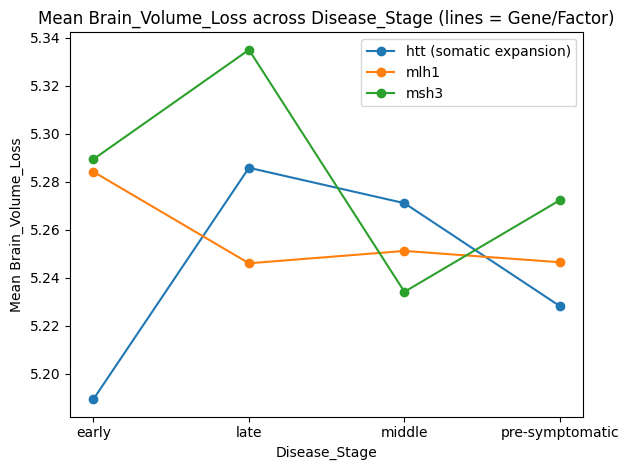

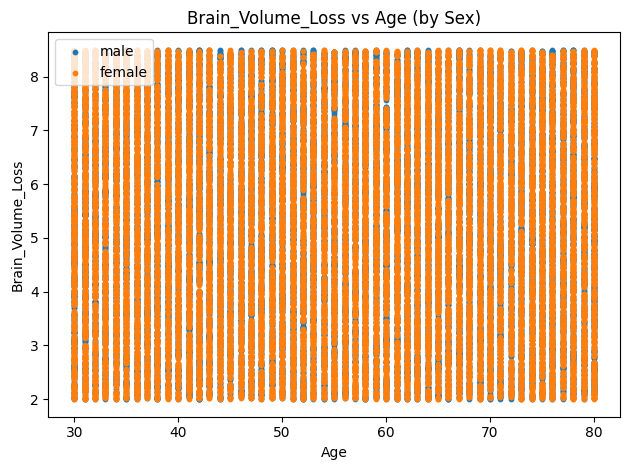

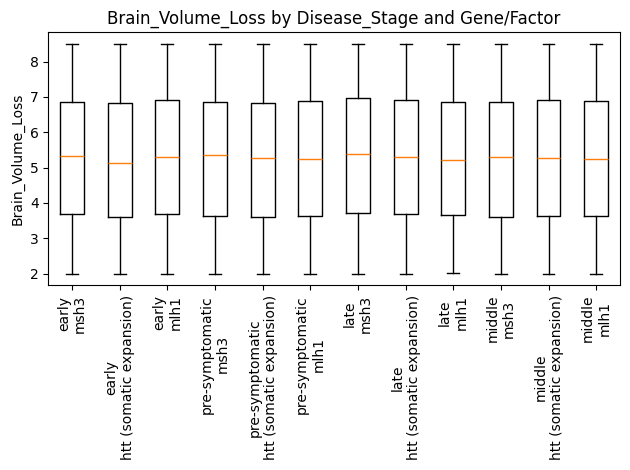

In [28]:
from src.EDA import plot_means_lines_stage_gene, plot_scatter_age_vs_dv, plot_boxplot_stage_gene

plot_means_lines_stage_gene(sub_df, "Brain_Volume_Loss", "Disease_Stage", "Gene/Factor")
plot_scatter_age_vs_dv(sub_df, "Age", "Brain_Volume_Loss", hue_col="Sex")
plot_boxplot_stage_gene(sub_df, "Brain_Volume_Loss", "Disease_Stage", "Gene/Factor")  # اختياري
